# El tratamiento de variables categóricas

In [98]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [99]:
df = pd.read_csv("C:/Users/Megaport/Desktop/python/datos machine learning/ecom-expense/Ecom Expense.csv")

In [100]:
df.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485


In [101]:
dummy_gender = pd.get_dummies(df["Gender"], prefix="Gender")
dummy_city_tier = pd.get_dummies(df["City Tier"], prefix="City")
dummy_gender.head()

,Gender_Female,Gender_Male
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0


In [102]:
dummy_city_tier.head()

,City_Tier 1,City_Tier 2,City_Tier 3
0,1,0,0
1,0,1,0
2,0,1,0
3,1,0,0
4,0,1,0


In [103]:
column_name= df.columns.values.tolist()
column_name

['Transaction ID',
 'Age ',
 ' Items ',
 'Monthly Income',
 'Transaction Time',
 'Record',
 'Gender',
 'City Tier',
 'Total Spend']

In [104]:
df_new = df[column_name].join(dummy_gender)
column_names = df_new.columns.values.tolist()
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0


In [105]:
df_new = df_new[column_names].join(dummy_city_tier)
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0


In [106]:
feature_cols = ["Monthly Income", "Transaction Time", "Gender_Female", "Gender_Male", "City_Tier 1",
               "City_Tier 2", "City_Tier 3", "Record"]

In [107]:
x = df_new[feature_cols]
y = df_new["Total Spend"]

In [108]:
lm = LinearRegression()
lm.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [109]:
print(lm.intercept_)
print(lm.coef_)

-79.41713030137362
[ 1.47538980e-01  1.54946125e-01 -1.31025013e+02  1.31025013e+02
  7.67643260e+01  5.51389743e+01 -1.31903300e+02  7.72233446e+02]


In [110]:
#Con el list vemos la lista que no ha salido y con el zip unimos las partes que tenmos
list(zip(feature_cols, lm.coef_))

[('Monthly Income', 0.14753898049205738),
 ('Transaction Time', 0.1549461254958966),
 ('Gender_Female', -131.02501325554675),
 ('Gender_Male', 131.02501325554695),
 ('City_Tier 1', 76.76432601049535),
 ('City_Tier 2', 55.138974309232445),
 ('City_Tier 3', -131.9033003197278),
 ('Record', 772.2334457445648)]

In [111]:
lm.score(x, y)

0.9179923586131016

El modelo puede ser escrito como:
 * Total_spend = -79.41713030137362 + Monthly Income'* 0.14753898049205738 + Transaction Time'* 0.1549461254958966)
   ('Gender_Female'* -131.02501325554675) + (Gender_Male'* 131.02501325554695) + ('City_Tier 1'* 76.76432601049535) +
   ('City_Tier 2'*55.138974309232445) + ('City_Tier 3'* -131.9033003197278) + ('Record'* 772.2334457445648).
     * Si es hombre y vive en City Tier 1: -79.41713030137362 + Monthly Income'* 0.14753898049205738 + Transaction Time'* 0.1549461254958966) + (Gender_Male'* 131.02501325554695) + ('City_Tier 1'* 76.76432601049535) + ('Record'* 772.2334457445648).
     * Si es hombre y vive en City Tier 2: -79.41713030137362 + Monthly Income'* 0.14753898049205738 + Transaction Time'* 0.1549461254958966) + (Gender_Male'* 131.02501325554695) + ('City_Tier 2'*55.138974309232445) + ('Record'* 772.2334457445648).
  
Habría que sustituir cada uno que se necesitara según los datos que nos interesa


In [112]:
df_new["prediction"] = -79.41713030137362 + df_new['Monthly Income'] * 0.14753898049205738 + df_new['Transaction Time'] * 0.1549461254958966 + df_new['Gender_Female'] * -131.02501325554675 + df_new['Gender_Male'] * 131.02501325554695 + df_new['City_Tier 1'] * 76.76432601049535 + df_new['City_Tier 2'] * 55.138974309232445 + df_new['City_Tier 3'] * -131.9033003197278 + df_new['Record'] * 772.2334457445648

In [113]:
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3,prediction
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0,4903.696720
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0,4799.434826
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0,5157.082504
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0,8068.012996
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0,3581.980335


In [114]:
SSD = np.sum((df_new["prediction"] - df_new["Total Spend"])**2)
SSD

1517733985.3408163

In [115]:
RSE = np.sqrt(SSD/(len(df_new) - len(feature_cols)-1))
RSE

803.1318809818165

In [116]:
sales_mean = np.mean(df_new["Total Spend"])
sales_mean

6163.176415976714

In [117]:
error = RSE/sales_mean
error*100 #Lo multiplicamos por 100 para verlo en porcentaje

13.031135680294161

## Eliminar vaiables dummy redundantes

In [118]:
dummy_gender = pd.get_dummies(df["Gender"], prefix="Gender").iloc[:,1:]
dummy_gender.head()

,Gender_Male
0,0
1,0
2,1
3,0
4,0


In [121]:
dummy_city_tier = pd.get_dummies(df["City Tier"], prefix="City").iloc[:,1:]
dummy_city_tier.head()

,City_Tier 2,City_Tier 3
0,0,0
1,1,0
2,1,0
3,0,0
4,1,0


In [124]:
column_names = df.columns.values.tolist()
df_new = df[column_names].join(dummy_gender)
column_names = df_new.columns.values.tolist()
df_new = df_new[column_names].join(dummy_city_tier)
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Male,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,0,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,1,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,0,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,0,1,0


In [127]:
feature_cols = ["Monthly Income", "Transaction Time","Gender_Male","City_Tier 2", "City_Tier 3", "Record"]
X = df_new[feature_cols]
Y = df_new["Total Spend"]
lm = LinearRegression()
lm.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [128]:
print(lm.intercept_)

-133.67781754642238


In [129]:
list(zip(feature_cols, lm.coef_))

[('Monthly Income', 0.14753898049205744),
 ('Transaction Time', 0.15494612549589748),
 ('Gender_Male', 262.05002651109413),
 ('City_Tier 2', -21.625351701262595),
 ('City_Tier 3', -208.66762633022336),
 ('Record', 772.2334457445638)]

In [130]:
lm.score(X, Y)

0.9179923586131016

* Coeficientes con todas las variables

    * [('Monthly Income', 0.14753898049205738),
    * ('Transaction Time', 0.1549461254958966),
    * ('Gender_Female', -131.02501325554675),
    * ('Gender_Male', 131.02501325554695),
    * ('City_Tier 1', 76.76432601049535),
    * ('City_Tier 2', 55.138974309232445),
    * ('City_Tier 3', -131.9033003197278),
    * ('Record', 772.2334457445648)]

* Coeficientes tras enmascarar las variables dummy pertinentes

    * [('Monthly Income', 0.14753898049205744),
    * ('Transaction Time', 0.15494612549589748),
    * ('Gender_Male', 262.05002651109413),
    * ('City_Tier 2', -21.625351701262595),
    * ('City_Tier 3', -208.66762633022336),
    * ('Record', 772.2334457445638)]

## Transformación de variables para conseguir una relación no lineal

In [131]:
data_auto = pd.read_csv("C:/Users/Megaport/Desktop/python/datos machine learning/auto/auto-mpg.csv")

In [132]:
data_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [133]:
data_auto.shape

(406, 9)

In [134]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'CV vs MPG')

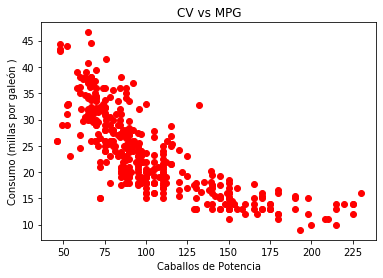

In [138]:
data_auto["mpg"] = data_auto["mpg"].dropna()
data_auto["horsepower"] = data_auto["horsepower"].dropna()
plt.plot(data_auto["horsepower"], data_auto["mpg"], "ro")
plt.xlabel("Caballos de Potencia")
plt.ylabel("Consumo (millas por galeón )")
plt.title("CV vs MPG")

### Modelo de regresión lineal

* mpg = a + b * horsepower

In [150]:
X = data_auto["horsepower"].fillna(data_auto["horsepower"].mean())
Y = data_auto["mpg"].fillna(data_auto["mpg"].mean())
X_data = X[:, np.newaxis]

In [147]:
lm = LinearRegression()
lm.fit(X[:, np.newaxis], Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [148]:
type(X[:, np.newaxis])

numpy.ndarray

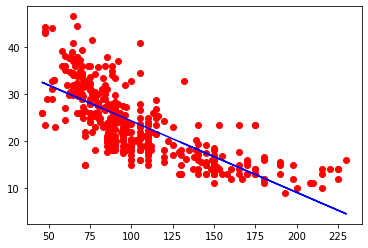

In [152]:
plt.plot(X, Y, "ro")
plt.plot(X, lm.predict(X_data), color="blue")

In [153]:
lm.score(X_data, Y)

0.574653340645025

In [156]:
#Desviación típica de los residuos
SSD = np.sum((Y - lm.predict(X_data))**2)
RSE = np.sqrt(SSD/(len(X_data)-1))
y_mean = np.mean(Y)
error = RSE/y_mean
SSD, RSE, y_mean, error*100


(10315.75196006092, 5.046879480825511, 23.51457286432162, 21.46277336163346)

### Modelo de regresión cuadrático

* mpg = a + b * horsepower**2

In [157]:
X_data = X**2
X_data = X_data[:, np.newaxis]

In [158]:
lm = LinearRegression()
lm.fit(X_data, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [159]:
lm.score(X_data, Y)

0.4849887034823205

In [160]:
SSD = np.sum((Y - lm.predict(X_data))**2)
RSE = np.sqrt(SSD/(len(X_data)-1))
y_mean = np.mean(Y)
error = RSE/y_mean
SSD, RSE, y_mean, error*100

(12490.350340501926, 5.553410772769817, 23.51457286432162, 23.6168898529981)

### Modelo de regresiçon lineal y cuadrático

* mpg = a + b horsepower * c horsepower^2

In [161]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [162]:
poly = PolynomialFeatures(degree=2)

In [163]:
X_data = poly.fit_transform(X[:, np.newaxis])

In [166]:
lm = linear_model.LinearRegression()
lm.fit(X_data, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [167]:
lm.score(X_data, Y)

0.6439066584257469

In [168]:
lm.intercept_

55.02619244708117

In [169]:
lm.coef_

array([ 0.        , -0.43404318,  0.00112615])

* mpg = 55.02619244708117 - -0.43404318 horsepower + 0.00112615 horsepower **2

In [194]:
for d in range(2,6):
    poly=PolynomialFeatures(degree=d)
    X_data = poly.fit_transform(X[:, np.newaxis])
    lm = linear_model.LinearRegression()
    lm.fit(X_data, Y)
    print("Regresión de grado "+ str(d))
    print(lm.score(X_data, Y))
    print(lm.intercept_)
    print(lm.coef_)
    print(regresion_validation(X_data, Y, lm.predict(X_data)))

Regresión de grado 2
0.6439066584257469
55.02619244708117
[ 0.         -0.43404318  0.00112615]
SSD: 8636.180643524502, RSE: 4.61778115803654, Y_mean: 23.51457286432162, error: 19.63795466190689%
None
Regresión de grado 3
0.6444678885560744
58.44877411167232
[ 0.00000000e+00 -5.27113167e-01  1.89736722e-03 -1.95723195e-06]
SSD: 8622.56936742855, RSE: 4.614140736300908, Y_mean: 23.51457286432162, error: 19.622473106036676%
None
Regresión de grado 4
0.6467674189704501
40.09664385584597
[ 0.00000000e+00  1.62563541e-01 -7.10892744e-03  4.65580255e-05
 -9.15840093e-08]
SSD: 8566.799832491355, RSE: 4.5991947315797574, Y_mean: 23.51457286432162, error: 19.55891250126878%
None
Regresión de grado 5
0.6547512491379645
-40.69402849011807
[ 0.00000000e+00  4.00021893e+00 -7.54802467e-02  6.19621641e-04
 -2.36220985e-06  3.41983153e-09]
SSD: 8373.171388755074, RSE: 4.546921734116981, Y_mean: 23.51457286432162, error: 19.33661206755735%
None


In [193]:
def regresion_validation(X_data, Y, Y_pred):
    SSD = np.sum((Y - Y_pred)**2)
    RSE = np.sqrt(SSD/(len(X_data)-1))
    Y_mean = np.mean(Y)
    error = RSE/y_mean
    print("SSD: "+str(SSD)+ ", RSE: "+str(RSE) +", Y_mean: "+ str(Y_mean) + ", error: "+ str(error*100)+"%")

# El Problema de los outliers

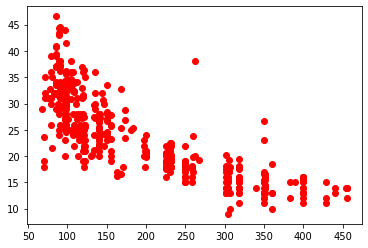

In [196]:
plt.plot(data_auto["displacement"], data_auto["mpg"], "ro")

In [199]:
X = data_auto["displacement"].fillna(data_auto["displacement"].mean())
X = X[:, np.newaxis]
Y = data_auto["mpg"].fillna(data_auto["mpg"].mean())

lm = LinearRegression()
lm.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [200]:
lm.score(X, Y)

0.6261049762826918

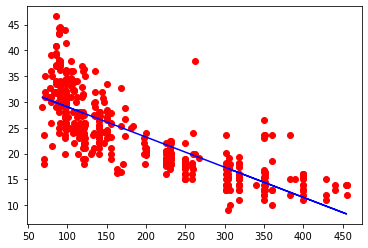

In [202]:
plt.plot(X, Y, "ro")
plt.plot(X, lm.predict(X), color="blue")

In [204]:
data_auto[(data_auto["displacement"]>250)&(data_auto["mpg"]>35)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
395,38.0,6,262.0,85.0,3015,17.0,82,1,oldsmobile cutlass ciera (diesel)


In [207]:
data_auto[(data_auto["displacement"]>300)&(data_auto["mpg"]>20)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
258,20.2,8,302.0,139.0,3570,12.8,78,1,mercury monarch ghia
305,23.0,8,350.0,125.0,3900,17.4,79,1,cadillac eldorado
372,26.6,8,350.0,105.0,3725,19.0,81,1,oldsmobile cutlass ls


In [209]:
data_auto_clean = data_auto.drop([395,372,305,258])

In [210]:
X = data_auto_clean["displacement"].fillna(data_auto_clean["displacement"].mean())
X = X[:, np.newaxis]
Y = data_auto_clean["mpg"].fillna(data_auto_clean["mpg"].mean())

lm = LinearRegression()
lm.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [211]:
lm.score(X, Y)

0.6466514317531822

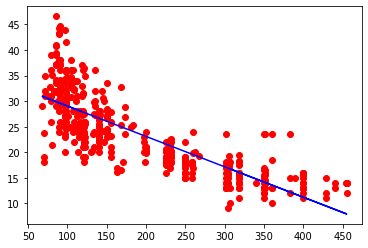

In [212]:
plt.plot(X, Y, "ro")
plt.plot(X, lm.predict(X), color="blue")